# Premier League Predictor

I am a fan of 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings(action='ignore')




In [3]:
TEAM_LIST = [
        'bournemouth',
        'arsenal', 
        'aston villa', 
        'birmingham city', 
        'blackburn rovers',
        'blackpool',
        'bolton wanderers', 
        'brighton hove albion', 
        'burnley', 
        'cardiff city', 
        'charlton athletic', 
        'chelsea', 
        'crystal palace', 
        'derby county', 
        'everton', 
        'fulham', 
        'huddersfield town',
        'hull city',
        'leicester city', 
        'liverpool', 
        'manchester city', 
        'manchester united', 
        'middlesbrough', 
        'newcastle united', 
        'norwich city', 
        'portsmouth', 
        'queens park rangers', 
        'reading', 
        'sheffield united', 
        'southampton', 
        'stoke city', 
        'sunderland',
        'swansea city',
        'tottenham hotspur', 
        'watford', 
        'west bromwich albion', 
        'west ham united', 
        'wigan athletic', 
        'wolverhampton wanderers'
    ]

DATE_DICT = {
    '18/19': '2018',
    '17/18': '2017',
    '16/17': '2016',
    '15/16': '2015',
    '14/15': '2014',
    '13/14': '2013',
    '12/13': '2012',
    '11/12': '2011',
    '10/11': '2010',
    '09/10': '2009',
    '08/09': '2008',
    '07/08': '2007',
    '06/07': '2006',
    '05/06': '2005'}

SEASON_LIST = [
    2018,
    2017,
    2016,
    2015,
    2014,
    2013,
    2012,
    2011,
    2010,
    2009,
    2008,
    2007,
    2006,
    2005]

In [4]:
all_year_with = pd.read_csv('teams/all_last.csv', index_col=0)
all_year_with.head()
del all_year_with['Points_todel']

In [14]:
all_year = all_year_with
all_year

,year,Rank,Points,GD,GF,GA,Win,Draw,Loss,g_age,...,bought,sold,attendance,name,squad_age,squad_total_value,squad_avg_value,net_spent_transfer,count,point_last
0,2018,1,98,72,95,21,32,2,4,27.000,...,69380000,48690000,54130,manchester city,26.698,263475000,39237500,-20690000,14,100.000
1,2017,1,100,79,106,27,32,4,2,27.000,...,285750000,82220000,53812,manchester city,24.540,138682500,16392500,-203530000,14,78.000
2,2016,3,78,41,80,39,23,9,6,29.000,...,192150000,31820000,54019,manchester city,25.398,139817500,11962500,-160330000,14,66.000
3,2015,4,66,30,71,41,19,9,10,32.670,...,187470000,60690000,54041,manchester city,25.532,101870000,10312500,-126780000,14,79.000
4,2014,2,79,45,83,38,24,7,7,31.670,...,79470000,27560000,45365,manchester city,26.415,107552500,11307500,-51910000,14,86.000
5,2013,1,86,65,102,37,27,5,6,29.000,...,104400000,10170000,47080,manchester city,25.922,109352500,14990000,-94230000,14,78.000
6,2012,2,78,32,66,34,23,9,6,25.750,...,55760000,39870000,46974,manchester city,24.062,117170000,10717500,-15890000,14,89.000
7,2011,1,89,64,93,29,28,5,5,26.000,...,81950000,28080000,47045,manchester city,24.685,103905000,10830000,-53870000,14,71.000
8,2010,3,71,27,60,33,21,8,9,28.250,...,165240000,33440000,45905,manchester city,24.470,86070000,7577500,-131800000,14,67.000
9,2009,5,67,28,73,45,18,13,7,26.200,...,132570000,27860000,45470,manchester city,24.328,70855000,6552500,-104710000,14,50.000


In [15]:
from scipy import stats
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

In [16]:
x_obs, y_obs = ecdf(all_year.Points)

In [17]:
#estimate x and y for theoritical samples for ecdf
mean = np.mean(all_year.Points)
std = np.std(all_year.Points)
samples = np.random.normal(mean, std, 10000)

x_theo, y_theo = ecdf(samples)

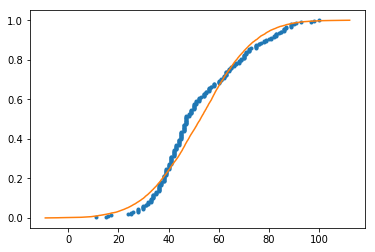

In [18]:
#plot ecdfs using the actual and theoritical observations 
_ = plt.plot(x_obs, y_obs, marker='.', linestyle='none')
_ = plt.plot(x_theo, y_theo)

In [19]:
chi, p_points = stats.chisquare(all_year.Points)
print(chi, p_points)

1641.2026215182962 2.4760532732511662e-191


In [20]:
log_points = np.log(all_year.Points)

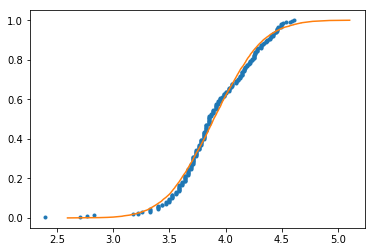

In [21]:
#plot ecdf for log of Income
x_log, y_log = ecdf(log_points)
x_theo_log, y_theo_log = ecdf(np.random.normal(np.mean(log_points), np.std(log_points), 10000))

_ = plt.plot(x_log, y_log, marker='.', linestyle='none')
_ = plt.plot(x_theo_log, y_theo_log)

In [22]:
chi1, p_log_points = stats.chisquare(log_points)
print(chi1, p_log_points)

8.565453475517064 1.0


In [41]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, BayesianRidge

## take out wins, gd, gf , ga all parts of point reflection
NUMERIC = ['year', 'g_age', 'g_total_value', 'g_avg_value', 'd_age', 'd_total_value',
        'd_avg_value', 'm_age', 'm_total_value', 'm_avg_value', 'a_age',
        'a_total_value', 'a_avg_value', 'bought', 'sold',
        'squad_age', 'squad_total_value', 'squad_avg_value',
        'net_spent_transfer', 'count', 'point_last']



POINTS = ['Points']

In [39]:
X = all_year_with[NUMERIC]
y = all_year_with[POINTS].astype(np.float64)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [30]:
regr = RandomForestRegressor()

In [31]:
parameters = {"max_depth": list(range(1,10))
              , "min_samples_split": [50,100,200]
              , "n_estimators": list(range(1,5))
              , "max_features": list(range(2,18))  }

In [32]:
regr_cv =  GridSearchCV(regr, parameters, cv=5)

In [33]:
regr_cv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [50, 100, 200], 'n_estimators': [1, 2, 3, 4], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print("Tuned Random Forest Regressor Parameters: {}".format(regr_cv.best_params_))
print("Best Score is: {}".format(regr_cv.best_score_))

Tuned Random Forest Regressor Parameters: {'max_depth': 7, 'max_features': 11, 'min_samples_split': 50, 'n_estimators': 4}
Best Score is: 0.6191588793117618


In [35]:
y_pred = regr_cv.predict(X_test)

In [36]:
print("R^2: {}".format(regr_cv.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.656898799188463
Root Mean Squared Error: 10.672376982258273


In [42]:
steps = [('scaler', StandardScaler()),
         ('regr', RandomForestRegressor())]

pipeline = Pipeline(steps)

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [44]:
y_pred = pipeline.predict(X_test)

In [45]:
print("R^2: {}".format(pipeline.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6484004564574513
Root Mean Squared Error: 10.803741635809944


In [46]:
parameters = {'regr__max_depth':list(range(1,10)),
              'regr__min_samples_split':[50,100,200],
              'regr__n_estimators': list(range(1,5)), 
              'regr__max_features': list(range(2,18)) }




In [ ]:
# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)



In [235]:
# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("R^2: {}".format(cv.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6157578030164508
Root Mean Squared Error: 11.294124397195853


In [236]:
## 12 points off is not good!

In [237]:
steps = [('scaler', StandardScaler()),
         ('br', BayesianRidge())]

pipeline = Pipeline(steps)

In [238]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('br', BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False))])

In [239]:
# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("R^2: {}".format(pipeline.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.613112596764195
Root Mean Squared Error: 11.332933315040043


In [240]:
parameters = {'br__n_iter':[1, 100, 200, 300, 400],
              'br__tol':[.0001,.001,.01,.1],
              'br__alpha_1': [1e-07, 1e-06, 1e-05, 1e-04],
              'br__alpha_2': [1e-07, 1e-06, 1e-05, 1e-04]}

In [241]:
# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('br', BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'br__n_iter': [1, 100, 200, 300, 400], 'br__tol': [0.0001, 0.001, 0.01, 0.1], 'br__alpha_1': [1e-07, 1e-06, 1e-05, 0.0001], 'br__alpha_2': [1e-07, 1e-06, 1e-05, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [242]:
# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("R^2: {}".format(cv.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6131165875680277
Root Mean Squared Error: 11.332874864403031


In [9]:
all_year.columns

Index(['year', 'Rank', 'Points', 'GD', 'GF', 'GA', 'Win', 'Draw', 'Loss',
       'g_age', 'g_total_value', 'g_avg_value', 'd_age', 'd_total_value',
       'd_avg_value', 'm_age', 'm_total_value', 'm_avg_value', 'a_age',
       'a_total_value', 'a_avg_value', 'link', 'bought', 'sold', 'attendance',
       'name', 'squad_age', 'squad_total_value', 'squad_avg_value',
       'net_spent_transfer'],
      dtype='object')

In [219]:
from sklearn.pipeline import FeatureUnion
# Import classifiers

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# Import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MaxAbsScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, roc_curve, auc
from sklearn.feature_selection import RFE







In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [244]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=.4, normalize=True)

# Fit the regressor to the data
lasso.fit(all_year[NUMERIC], all_year[POINTS])

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.          0.          0.         -0.          0.00000008
  0.         -0.          0.          0.         -0.          0.
  0.          0.          0.         -0.          0.00000002  0.
 -0.          0.51311709  0.        ]


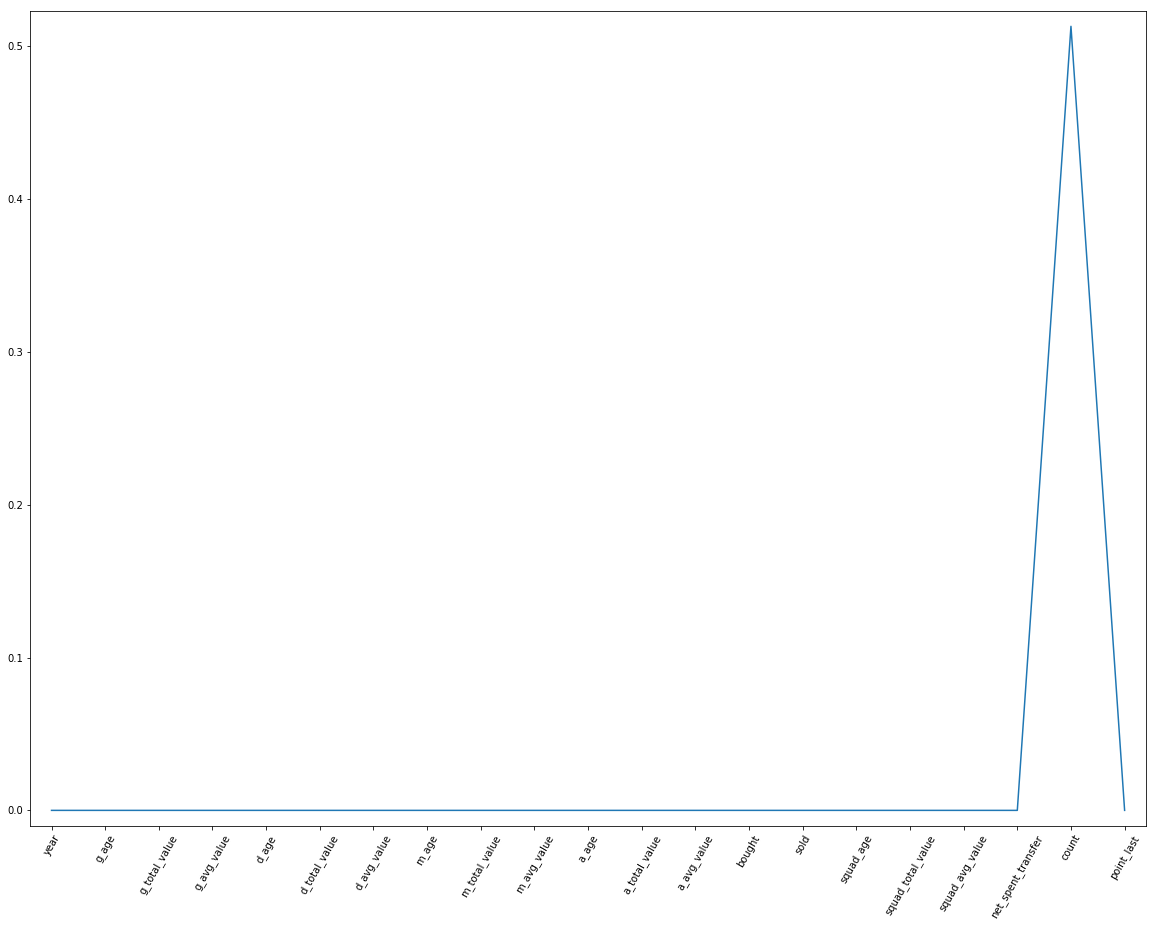

In [245]:
plt.subplots(figsize=(20,15))
plt.plot(range(len(all_year[NUMERIC].columns)), lasso_coef)
plt.xticks(range(len(all_year[NUMERIC].columns)), all_year[NUMERIC].columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [246]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [247]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: [2386.12229097]


In [248]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 1


In [249]:
X_cols = X_train.columns
pd.DataFrame({'features': X_cols, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Exception: Data must be 1-dimensional

In [250]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [257]:
all_year.columns

Index(['year', 'Rank', 'Points', 'GD', 'GF', 'GA', 'Win', 'Draw', 'Loss',
       'g_age', 'g_total_value', 'g_avg_value', 'd_age', 'd_total_value',
       'd_avg_value', 'm_age', 'm_total_value', 'm_avg_value', 'a_age',
       'a_total_value', 'a_avg_value', 'link', 'bought', 'sold', 'attendance',
       'name', 'squad_age', 'squad_total_value', 'squad_avg_value',
       'net_spent_transfer', 'count_x', 'count_y', 'count_x', 'count_y',
       'rank -1', 'rank -2', 'rank -3', 'rank -4', 'rank -5', 'point_last',
       'count'],
      dtype='object')

In [253]:
m = ols('Points ~ count + point_last + squad_total_value',all_year).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     192.7
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           3.55e-53
Time:                        09:42:45   Log-Likelihood:                -1076.8
No. Observations:                 280   AIC:                             2160.
Df Residuals:                     277   BIC:                             2171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            26.3471      1.82

In [ ]:
#specify independent and response/dependent variable: X, y
X = df5.drop('Income', axis=1)
y = df5.Income